In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_excel(r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\combined_unique.xlsx")

In [3]:
df.to_csv(r"C:\Users\venku\dsi\DSI_ML6\Online_Retail_II\my_work\combined_unique.csv", index=False)

In [4]:
df['Description'].value_counts()


Description
WHITE HANGING HEART T-LIGHT HOLDER    5740
REGENCY CAKESTAND 3 TIER              4295
JUMBO BAG RED RETROSPOT               3388
ASSORTED COLOUR BIRD ORNAMENT         2868
PARTY BUNTING                         2730
                                      ... 
SPOTTY CAT DOORSTOP                      1
SET OF 4 KNICK KNACK TINS  DOILEY        1
Dagamed                                  1
SILVER PURSE GOLD PINK BUTTERFLY         1
wrong ctn size                           1
Name: count, Length: 5698, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033036 entries, 0 to 1033035
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.1+ MB


In [5]:
unique_items_per_invoice = (
    df.groupby('Invoice')['StockCode']
      .nunique()
      .reset_index()
)

unique_items_per_invoice.rename(
    columns={'StockCode': 'Num_Unique_Items'},
    inplace=True
)


In [6]:
# Create categories
unique_items_per_invoice['Item_Category'] = pd.cut(
    unique_items_per_invoice['Num_Unique_Items'],
    bins=[0, 1, 2, 3, 4, float('inf')],
    labels=['1 item', '2 items', '3 items', '4 items', '5+ items'],
    right=True
)


In [7]:
category_counts = unique_items_per_invoice['Item_Category'].value_counts().sort_index()
print(category_counts)

Item_Category
1 item      13666
2 items      3296
3 items      2194
4 items      1676
5+ items    32796
Name: count, dtype: int64


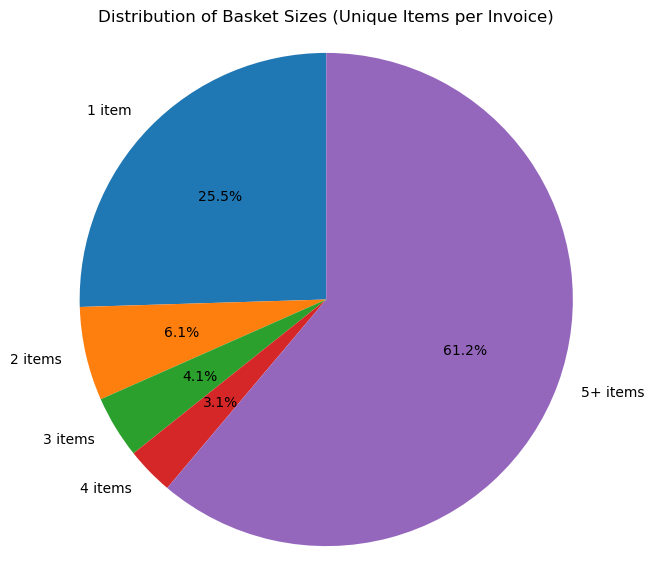

In [15]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribution of Basket Sizes (Unique Items per Invoice)")
plt.axis('equal')   # Makes the pie chart a circle
plt.show()


<Axes: ylabel='Description'>

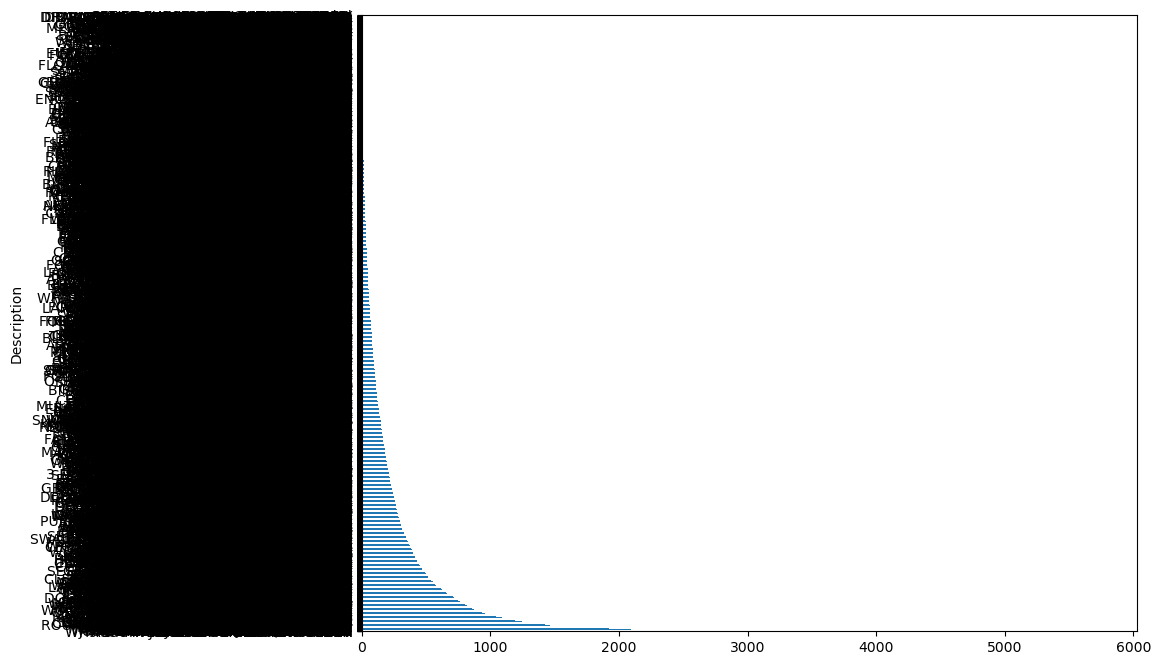

In [7]:
df['Description'].value_counts().plot(kind='barh', figsize=(10,8))

<Axes: title={'center': 'Top 10 Product Descriptions by Frequency'}, ylabel='Description'>

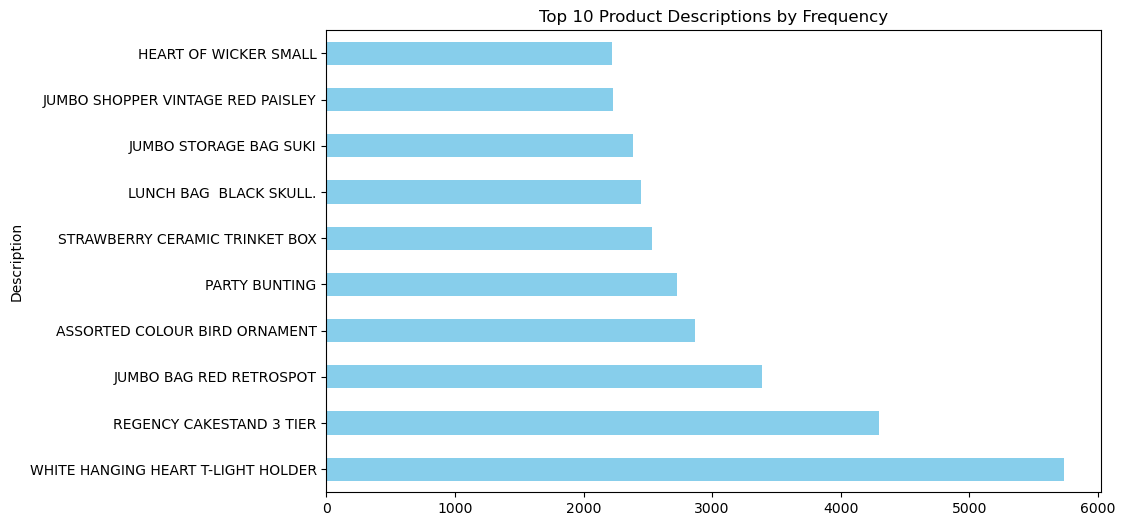

In [8]:
top10_descriptions = df['Description'].value_counts().head(10)
top10_descriptions.plot(kind='barh', figsize=(10,6), color='skyblue', title='Top 10 Product Descriptions by Frequency')    

In [9]:
import pandas as pd

# Count unique descriptions per invoice
unique_desc_per_invoice = df.groupby('Invoice')['Description'].nunique().reset_index()

# Rename the column for clarity
unique_desc_per_invoice.rename(columns={'Description': 'Num_Unique_Descriptions'}, inplace=True)

# Sort invoices by number of unique descriptions (descending)
top_100_invoices = unique_desc_per_invoice.sort_values(
    by='Num_Unique_Descriptions', 
    ascending=False
).head(100)

print("Top 100 invoices with the highest number of unique descriptions:")
print(top_100_invoices)



Top 100 invoices with the highest number of unique descriptions:
      Invoice  Num_Unique_Descriptions
41410  573585                     1108
45166  581219                      749
45301  581492                      731
44914  580729                      721
33982  558475                      703
...       ...                      ...
22324  534289                      437
776    490963                      435
41401  573576                      434
24752  539436                      434
34630  559816                      434

[100 rows x 2 columns]


In [10]:
import pandas as pd

# Count unique descriptions per invoice
unique_desc_per_invoice = df.groupby('Invoice')['Description'].nunique().reset_index()

# Rename the column for clarity
unique_desc_per_invoice.rename(columns={'Description': 'Num_Unique_Descriptions'}, inplace=True)

# Sort invoices by number of unique descriptions (descending)
top_10_invoices = unique_desc_per_invoice.sort_values(
    by='Num_Unique_Descriptions', 
    ascending=False
).head(10)

print("Top 10 invoices with the highest number of unique descriptions:")
print(top_10_invoices)


Top 10 invoices with the highest number of unique descriptions:
      Invoice  Num_Unique_Descriptions
41410  573585                     1108
45166  581219                      749
45301  581492                      731
44914  580729                      721
33982  558475                      703
44433  579777                      687
45164  581217                      676
23845  537434                      674
44915  580730                      661
44698  580367                      649


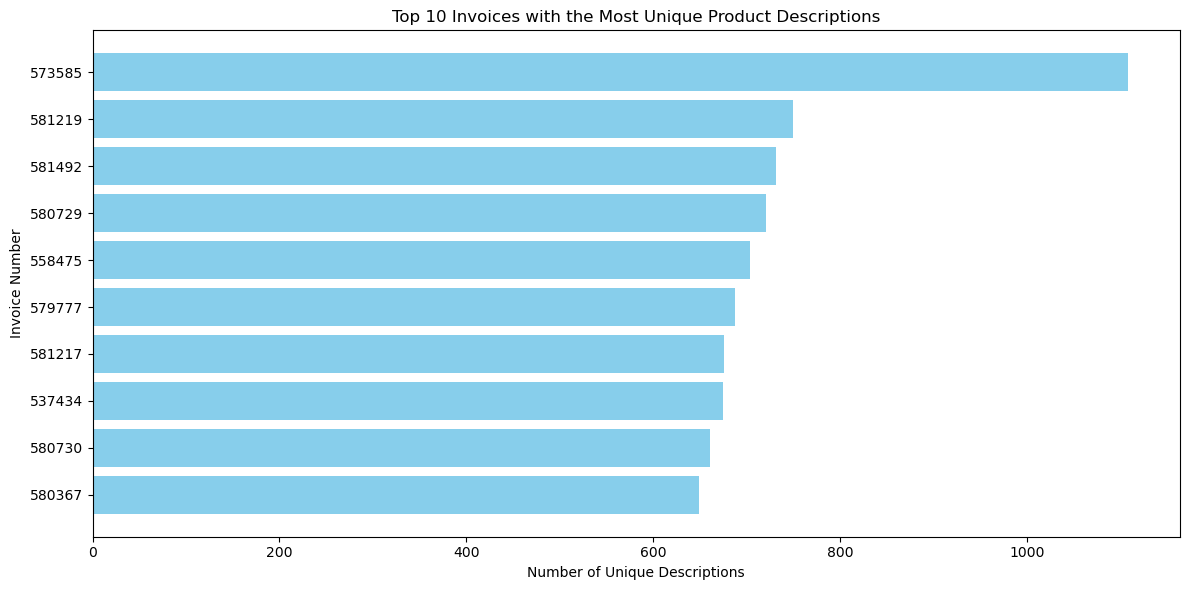

In [11]:
import matplotlib.pyplot as plt

# Plot horizontal bar chart
plt.figure(figsize=(12,6))
plt.barh(
    top_10_invoices['Invoice'].astype(str),  # Convert Invoice to string for labels
    top_10_invoices['Num_Unique_Descriptions'],
    color='skyblue'
)
plt.xlabel('Number of Unique Descriptions')
plt.ylabel('Invoice Number')
plt.title('Top 10 Invoices with the Most Unique Product Descriptions')
plt.gca().invert_yaxis()  # largest at the top
plt.tight_layout()
plt.show()

In [12]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

# Convert to numeric, coercing errors to NaN
df['Invoice'] = pd.to_numeric(df['Invoice'], errors='coerce')
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')

# Drop rows with NaN after conversion (if needed)
df = df.dropna(subset=['Invoice', 'StockCode'])

# Convert to integer type
df['Invoice'] = df['Invoice'].astype(int)
df['StockCode'] = df['StockCode'].astype(int)

# Check result
print(df.dtypes)
print(df.head())


Invoice                 int32
StockCode               int32
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
   Invoice  StockCode                          Description  Quantity  \
0   489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
3   489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434      22064           PINK DOUGHNUT TRINKET POT         24   
6   489434      21871                  SAVE THE PLANET MUG        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 

In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# -----------------------------
# Step 1: Sample transactions
# -----------------------------
# Randomly sample 50,000 invoices (adjust n as needed)
sample_invoices = df['Invoice'].drop_duplicates().sample(n=5000, random_state=42)
sample_df = df[df['Invoice'].isin(sample_invoices)]

# -----------------------------
# Step 2: Create transaction list
# -----------------------------
basket = sample_df.groupby('Invoice')['StockCode'].apply(list)

# -----------------------------
# Step 3: Encode transactions
# -----------------------------
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# -----------------------------
# Step 4: Frequent itemset mining
# -----------------------------
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

# -----------------------------
# Step 5: Generate association rules
# -----------------------------
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort by lift and confidence
rules = rules.sort_values(['lift', 'confidence'], ascending=False)

# -----------------------------
# Step 6: View top 10 rules
# -----------------------------
print(rules.head(10))





        antecedents     consequents  antecedent support  consequent support  \
538         (22745)         (22748)              0.0148              0.0166   
539         (22748)         (22745)              0.0166              0.0148   
853         (21899)  (21900, 21901)              0.0170              0.0126   
852  (21900, 21901)         (21899)              0.0126              0.0170   
851  (21899, 21901)         (21900)              0.0114              0.0204   
854         (21900)  (21899, 21901)              0.0204              0.0114   
219         (21124)         (21122)              0.0144              0.0186   
218         (21122)         (21124)              0.0186              0.0144   
850  (21899, 21900)         (21901)              0.0130              0.0182   
855         (21901)  (21899, 21900)              0.0182              0.0130   

     support  confidence       lift  representativity  leverage  conviction  \
538   0.0122    0.824324  49.658092               1

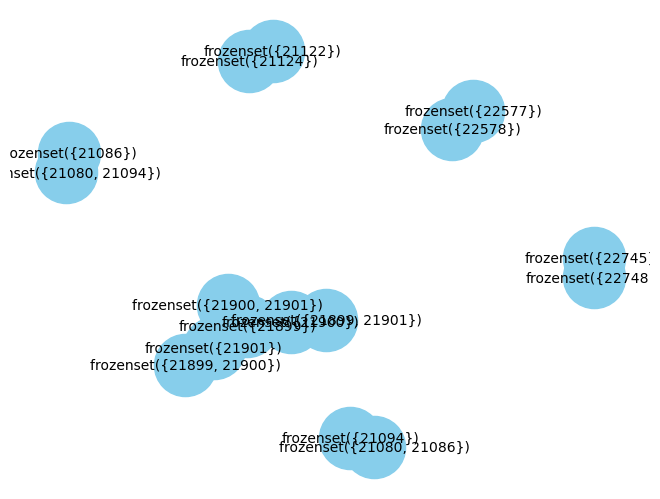

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph from top rules
G = nx.from_pandas_edgelist(rules.head(20), 'antecedents', 'consequents', ['lift'])
nx.draw(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)
plt.show()
